In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import chi2_contingency
from scipy import stats
from IPython.display import display
import sys
sys.path.append("../src")

from risk_analysis_seg import segmentacao_risco_final, segmentacao_risco_final_v2,criar_grupos_estrategicos

In [2]:
file_path = "../artifacts/synthetic_personal_finance_dataset.csv"
df = pd.read_csv(file_path)
df.shape

(32424, 20)

In [3]:
# Solução provisória - criar categoria 'None' para quem não tem empréstimo
df['loan_type'] = df['loan_type'].fillna('None')

# 1. Analise de Risco/Risk Analysis

# 1.1. Segmentação de Perfil/Profile Segmentation



## Introdução à Segmentação de Risco

O processo de construção de perfis de crédito apresentado segue uma abordagem estratificada que combina técnicas estatísticas com regras de negócio flexíveis. A metodologia foi desenvolvida em duas versões progressivas — uma abordagem inicial (`segmentacao_risco_final`) e uma versão aprimorada (`segmentacao_risco_final_v2`) — que incorporam aprendizados obtidos a partir da análise exploratória dos dados.

## Passo 1: Preparação dos Fundamentos de Risco

**Base Conceitual:**
O sistema parte do princípio de que o risco de crédito é multidimensional, sendo influenciado por:

* Fatores tradicionais (score de crédito, renda, dívidas)
* Elementos contextuais (região geográfica, situação de emprego)
* Indicadores financeiros chave (proporções poupança/renda e dívida/renda)

**Tratamento Inicial de Variáveis:**

* Normalização do debt-to-income ratio (DTI) com truncamento a 50% para mitigar distorções causadas por outliers
* Criação de um “score ajustado”, combinando credit\_score e DTI (Score Ajustado = Credit Score - 2 × DTI)

## Passo 2: Definição Dinâmica de Limiares

**Abordagem Percentílica:**

* Utilização dos quartis (25% e 75%) da distribuição do score ajustado como pontos de corte iniciais
* Limiar de Baixo Risco: percentil 75 (\~650 pontos)
* Limiar de Alto Risco: percentil 25 (\~400 pontos)

**Regras Complementares:**
Para refinar a classificação, foram aplicadas regras adicionais:

* Baixo Risco:

  * DTI < 35%
  * Renda > \$3.000/mês
  * Situação empregatícia diferente de “Desempregado”
* Alto Risco:

  * DTI > 45% OU
  * Situação de “Desempregado” OU
  * Proporção poupança/renda < 5%

## Passo 3: Modelagem de Componentes Naturais (Versão Aprimorada)

**Inovação na Abordagem V2:**

* Aplicação do Gaussian Mixture Model (GMM) com 2 componentes para identificar padrões naturais na distribuição de crédito
* Construção do “financial\_stability\_index”, composto por:

  * 40% do credit score normalizado
  * 30% do DTI invertido
  * 20% do logaritmo das poupanças
  * 10% de estabilidade empregatícia (proxy pelo tempo no emprego)

**Fatores de Ajuste Regional e Profissional:**

* Fatores regionais recalibrados (Europa: +7%; África: -7%)
* Fatores de emprego com maior diferenciação (Empregado: +7%; Desempregado: -15%)

## Passo 4: Segmentação Estratégica de Grupos

**Lógica de Classificação Hierárquica:**

1. **Premium Elite**: PhD/Master, renda top 10%, score ≥ mediana+75, DTI<15%
2. **Premium Prime**: Superior completo, renda top 25%, score ≥ mediana+40
3. **Premium Emergent**: Jovens (<40) com alto potencial e poupança robusta
4. **Premium Traditional**: Perfil conservador com renda 30% acima da mediana
5. **Standard Secure**: Empregados com score acima da mediana+20
6. **Standard**: Base geral de empregados
7. **Basic Stable**: Autônomos ou estudantes com renda >80% da mediana
8. **Basic Vulnerable**: Desempregados ou renda <60% da mediana

## Passo 5: Validação e Ajustes Pós-Segmentação

**Mecanismos de Correção:**

* Reclassificação automática de perfis “Premium” com score abaixo de 600 para “Standard Secure”
* Balanceamento das proporções para evitar concentrações extremas:

  * Baixo Risco: \~25%
  * Médio Risco: \~50%
  * Alto Risco: \~25%

**Análise Dimensional:**

* Cruzamento com dados demográficos (gênero, região)
* Interseção com variáveis profissionais (cargos de alto risco)
* Segmentação etária (18-30, 31-40, 41-50, 51-70)

---


## Introduction to Risk Segmentation

The credit profiling process presented follows a stratified approach that combines statistical techniques with flexible business rules. The methodology was developed in two progressive versions — an initial approach (`segmentacao_risco_final`) and an enhanced version (`segmentacao_risco_final_v2`) — which incorporate insights gained from exploratory data analysis.

## Step 1: Preparation of Risk Foundations

**Conceptual Basis:**
The system is built on the premise that credit risk is multidimensional, influenced by:

* Traditional factors (credit score, income, debts)
* Contextual elements (geographic region, employment status)
* Key financial indicators (savings-to-income and debt-to-income ratios)

**Initial Variable Processing:**

* Normalization of the debt-to-income ratio (DTI) with truncation at 50% to mitigate distortion from outliers
* Creation of an “adjusted score” that combines credit\_score and DTI (Adjusted Score = Credit Score - 2 × DTI)

## Step 2: Dynamic Threshold Definition

**Percentile-Based Approach:**

* Use of the 25th and 75th percentiles of the adjusted score distribution as initial cut-off points
* Low-Risk Threshold: 75th percentile (\~650 points)
* High-Risk Threshold: 25th percentile (\~400 points)

**Complementary Rules:**
To refine the classification, additional rules were applied:

* Low Risk:

  * DTI < 35%
  * Income > \$3,000/month
  * Employment status different from “Unemployed”
* High Risk:

  * DTI > 45% OR
  * Employment status “Unemployed” OR
  * Savings-to-income ratio < 5%

## Step 3: Modeling Natural Components (Enhanced Version)

**Innovation in V2 Approach:**

* Application of a Gaussian Mixture Model (GMM) with two components to identify natural patterns in credit distribution
* Creation of a “financial\_stability\_index” composed of:

  * 40% normalized credit score
  * 30% inverse DTI
  * 20% logarithm of savings
  * 10% employment stability (proxied by tenure in current job)

**Regional and Professional Adjustment Factors:**

* Regional factors recalibrated (Europe: +7%; Africa: -7%)
* Employment factors with greater differentiation (Employed: +7%; Unemployed: -15%)

## Step 4: Strategic Group Segmentation

**Hierarchical Classification Logic:**

1. **Premium Elite**: PhD/Master’s degree, top 10% income, score ≥ median+75, DTI<15%
2. **Premium Prime**: Bachelor’s degree, top 25% income, score ≥ median+40
3. **Premium Emergent**: Young (<40) individuals with high potential and strong savings
4. **Premium Traditional**: Conservative profile with income 30% above the median
5. **Standard Secure**: Employed individuals with score above median+20
6. **Standard**: General employed population
7. **Basic Stable**: Self-employed/students with income >80% of median
8. **Basic Vulnerable**: Unemployed or income <60% of median

## Step 5: Post-Segmentation Validation and Adjustments

**Correction Mechanisms:**

* Automatic reclassification of “Premium” profiles with scores below 600 to “Standard Secure”
* Balancing of proportions to avoid extreme group concentrations:

  * Low Risk: \~25%
  * Medium Risk: \~50%
  * High Risk: \~25%

**Dimensional Analysis:**

* Cross-tabulation with demographic data (gender, region)
* Intersection with professional variables (high-risk occupations)
* Age segmentation (18-30, 31-40, 41-50, 51-70)



In [4]:

low_threshold = df['credit_score'].quantile(0.75)
high_threshold = df['credit_score'].quantile(0.25)

In [5]:
low_threshold

np.float64(714.0)

In [6]:
high_threshold

np.float64(437.0)

In [7]:
print("Estatísticas Descritivas:\n", df[['credit_score', 'debt_to_income_ratio', 'savings_to_income_ratio']].describe())

print("\nPercentis do Credit Score:")
for p in [0.1, 0.25, 0.5, 0.75, 0.9]:
    print(f"{p*100}%: {df['credit_score'].quantile(p):.0f}")

Estatísticas Descritivas:
        credit_score  debt_to_income_ratio  savings_to_income_ratio
count  32424.000000          32424.000000             32424.000000
mean     575.260424              1.194881                 5.045431
std      159.023227              3.761964                 2.851344
min      300.000000              0.000000                 0.100000
25%      437.000000              0.000000                 2.580000
50%      575.000000              0.000000                 5.040000
75%      714.000000              0.920000                 7.510000
max      850.000000             90.670000                10.000000

Percentis do Credit Score:
10.0%: 355
25.0%: 437
50.0%: 575
75.0%: 714
90.0%: 796


In [8]:
df = segmentacao_risco_final(df)
df = segmentacao_risco_final_v2(df)

print("Comparação das Distribuições:")
dist_comparacao = pd.DataFrame({
    'Original': df['risco_final'].value_counts(normalize=True).round(3),
    'Aprimorada': df['risco_final_v2'].value_counts(normalize=True).round(3)
})
print(dist_comparacao)


Comparação das Distribuições:
             Original  Aprimorada
Alto Risco      0.310       0.572
Baixo Risco     0.175       0.205
Médio Risco     0.515       0.223


Text(0, 0.5, 'Contagem')

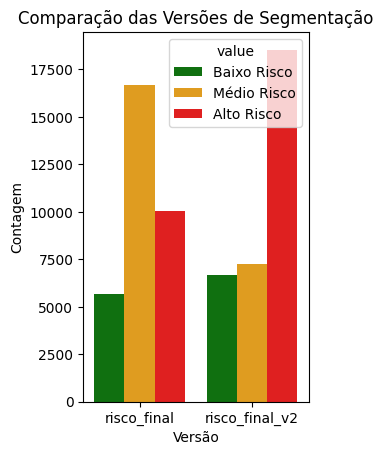

In [9]:

plt.subplot(1, 2, 1)
sns.countplot(data=pd.melt(df[['risco_final', 'risco_final_v2']]),
             x='variable', hue='value',
             hue_order=['Baixo Risco', 'Médio Risco', 'Alto Risco'],
             palette=['green', 'orange', 'red'])
plt.title('Comparação das Versões de Segmentação')
plt.xlabel('Versão')
plt.ylabel('Contagem')

In [10]:

print("Distribuição Geral:")
print(df['risco_final_v2'].value_counts(normalize=True).round(2))


Distribuição Geral:
risco_final_v2
Alto Risco     0.57
Médio Risco    0.22
Baixo Risco    0.21
Name: proportion, dtype: float64


In [11]:

df['dti_tratado'] = np.where(
    df['debt_to_income_ratio'] > 50,
    50,
    df['debt_to_income_ratio']
)


df['score_ajustado'] = df['credit_score'] - (df['dti_tratado'] * 2)

In [12]:

df['risco_final'] = pd.cut(
    df['score_ajustado'],
    bins=[-np.inf, 400, 650, np.inf],
    labels=['Alto Risco', 'Médio Risco', 'Baixo Risco']
)


print(df['risco_final'].value_counts(normalize=True))

risco_final
Médio Risco    0.454170
Baixo Risco    0.359795
Alto Risco     0.186035
Name: proportion, dtype: float64


Text(0.5, 0, 'Score Ajustado (Credit Score - 2*DTI)')

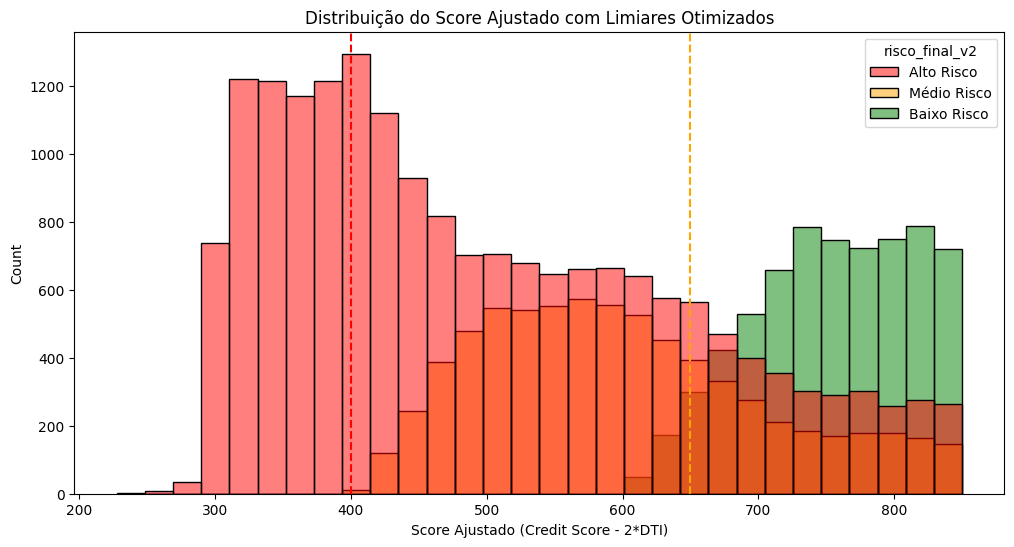

In [13]:
plt.figure(figsize=(12,6))


sns.histplot(data=df, x='score_ajustado', hue='risco_final_v2',
             bins=30, palette=['red', 'orange', 'green'],
             hue_order=['Alto Risco', 'Médio Risco', 'Baixo Risco'])

plt.axvline(400, color='red', linestyle='--')
plt.axvline(650, color='orange', linestyle='--')
plt.title('Distribuição do Score Ajustado com Limiares Otimizados')
plt.xlabel('Score Ajustado (Credit Score - 2*DTI)')

# 2. Análise por Grupos Específicos/Analysis by Specific Groups

# 2.1. Análise por Faixa Etária/Analysis by Age Group

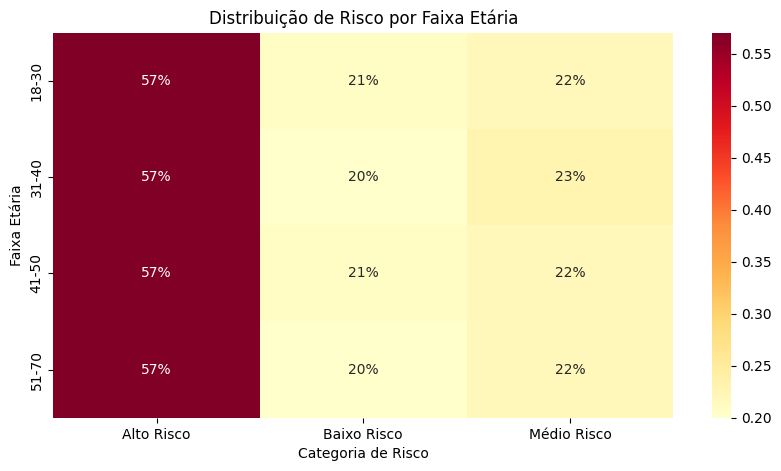

In [14]:

df['faixa_etaria'] = pd.cut(df['age'],
                           bins=[18, 30, 40, 50, 70],
                           labels=['18-30', '31-40', '41-50', '51-70'])


idade_risco = pd.crosstab(df['faixa_etaria'], df['risco_final_v2'], normalize='index').round(2)


plt.figure(figsize=(10, 5))
sns.heatmap(idade_risco, annot=True, cmap='YlOrRd', fmt='.0%')
plt.title('Distribuição de Risco por Faixa Etária')
plt.ylabel('Faixa Etária')
plt.xlabel('Categoria de Risco')
plt.show()

# 2.2. Análise por Nível Educacional e Emprego/Analysis by Educational Level and Employment

In [16]:
df = criar_grupos_estrategicos(df)
print("\nAnálise por Gênero e Região:")
display(pd.crosstab(
    index=[df['grupo_estrategico']],
    columns=[df['gender'], df['region']],
    values=df['credit_score'],
    aggfunc='median'
).round(1).style.background_gradient(cmap='viridis'))


Análise por Gênero e Região:


In [17]:


def plot_cross_analysis(df):

    cross_data = df.pivot_table(
        index='grupo_estrategico',
        columns=['gender', 'region'],
        values='credit_score',
        aggfunc='median'
    )


    plt.figure(figsize=(16, 8))
    sns.heatmap(
        cross_data,
        annot=True, fmt='.0f',
        cmap='RdYlGn',
        vmin=400, vmax=850,
        linewidths=0.5,
        cbar_kws={'label': 'Median Credit Score'}
    )


    plt.title('Análise de Credit Score por Grupo Estratégico, Gênero e Região\n', pad=20, fontsize=14)
    plt.xlabel('Gênero e Região')
    plt.ylabel('Grupo Estratégico')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


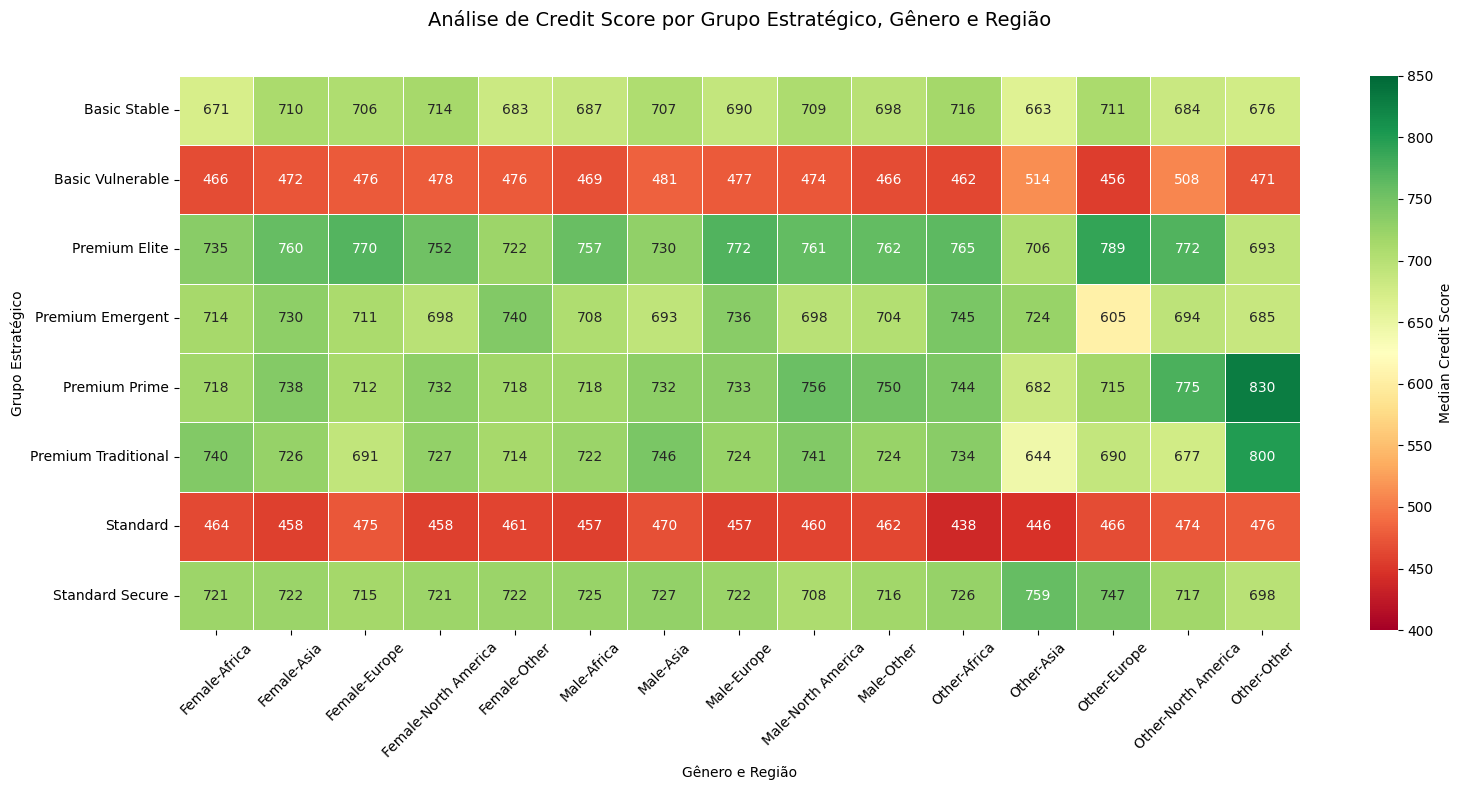

In [18]:
plot_cross_analysis(df)

# 3. Análise por Tipo de Empréstimo/Analysis by Loan Type

Question:Qual é a **proporção de cada tipo de empréstimo** (casa, educação, negócios, carro) na base de dados?/What is the **proportion of each loan type** (home, education, business, car) in the database?


Análise por Tipo de Empréstimo:
                    count                               mean              \
risco_final_v2 Alto Risco Baixo Risco Médio Risco Alto Risco Baixo Risco   
loan_type                                                                  
Business             1886         660         715  249213.87   242864.54   
Car                  1841         639         695  254384.46   251980.16   
Education            1894         658         723  252194.10   252483.20   
Home                 1814         695         775  250544.27   239150.90   

                            
risco_final_v2 Médio Risco  
loan_type                   
Business         249149.98  
Car              247634.55  
Education        252773.27  
Home             243851.71  


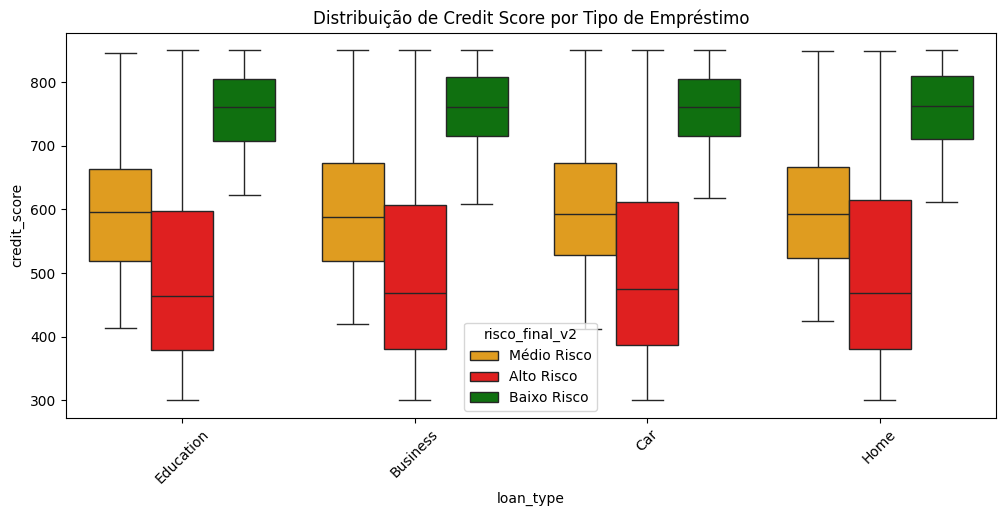

In [19]:
if 'has_loan' in df.columns:

    df_loan = df[df['has_loan'] == 'Yes']

    if not df_loan.empty and 'loan_type' in df_loan.columns:
        # Análise por tipo de empréstimo
        loan_analysis = pd.crosstab(df_loan['loan_type'], df_loan['risco_final_v2'],
                                   values=df_loan['loan_amount_usd'],
                                   aggfunc=['count', 'mean'])

        print("\nAnálise por Tipo de Empréstimo:")
        print(loan_analysis.round(2))

        # Visualização
        plt.figure(figsize=(12, 5))
        sns.boxplot(data=df_loan, x='loan_type', y='credit_score', hue='risco_final_v2',
                   palette={'Baixo Risco':'green', 'Médio Risco':'orange', 'Alto Risco':'red'})
        plt.title('Distribuição de Credit Score por Tipo de Empréstimo')
        plt.xticks(rotation=45)
        plt.show()


Distribuição Percentual de Tipos de Empréstimo por Região:
loan_type      Business    Car  Education   Home
region                                          
Africa            24.76  24.84      24.84  25.55
Asia              24.42  25.26      25.07  25.26
Europe            26.29  23.73      26.03  23.95
North America     24.98  24.06      24.79  26.17
Other             24.99  24.28      25.26  25.46

Teste de Chi-quadrado:
Estatística Chi2: 7.55
Valor-p: 0.8189
H0: Não há associação entre região e tipo de empréstimo
Conclusão: Não rejeitamos H0 (α=0.05)


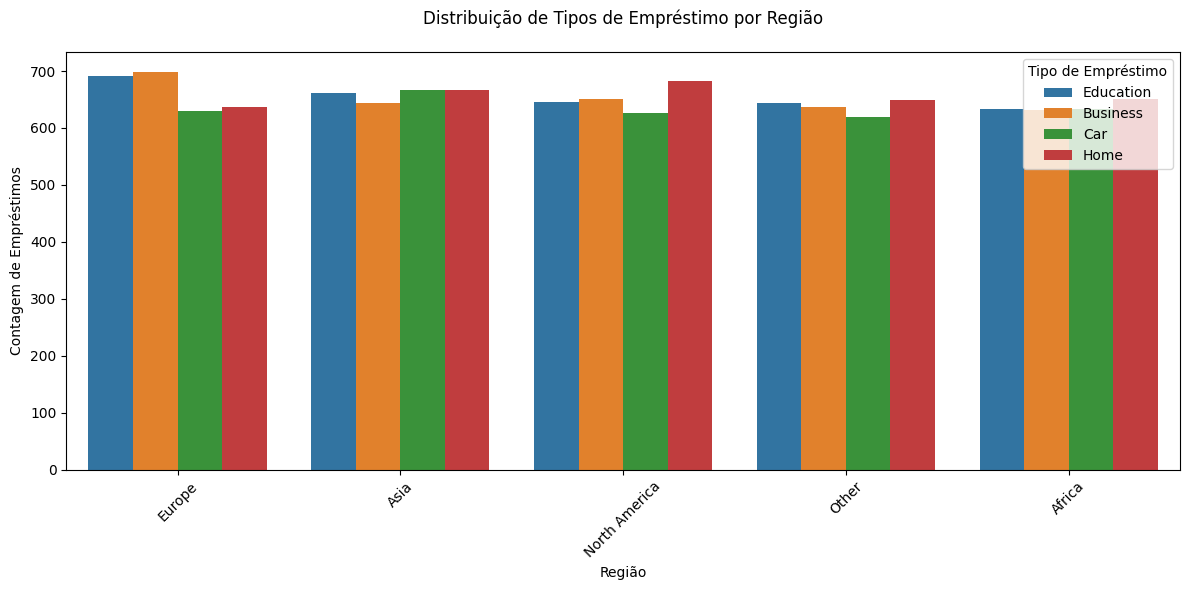

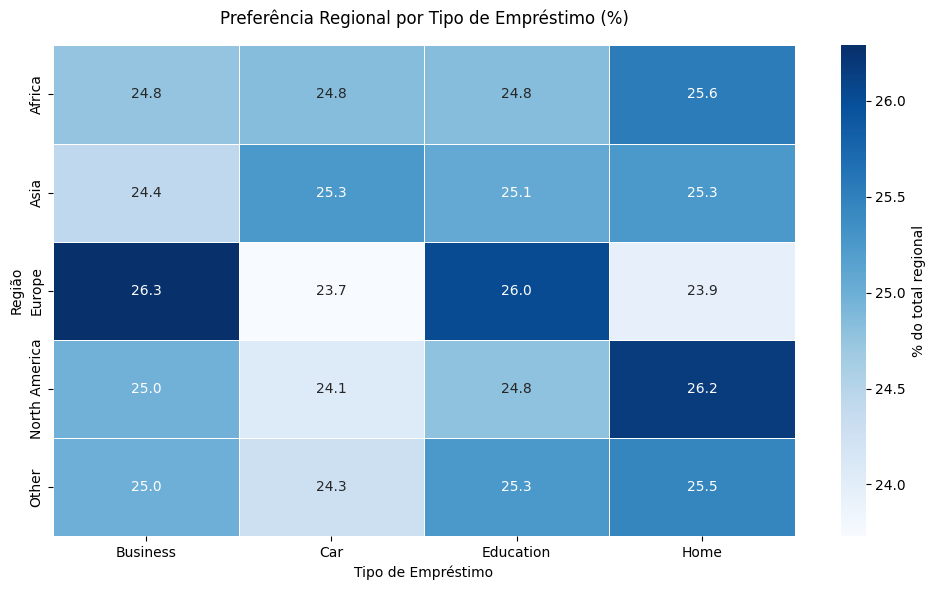

In [20]:


regional_loan_dist = pd.crosstab(
    df_loan['region'],
    df_loan['loan_type'],
    normalize='index'  # Percentual por linha (região)
).round(4) * 100

print("\nDistribuição Percentual de Tipos de Empréstimo por Região:")
print(regional_loan_dist)



chi2, p, dof, expected = chi2_contingency(
    pd.crosstab(df_loan['region'], df_loan['loan_type'])
)

print(f"\nTeste de Chi-quadrado:")
print(f"Estatística Chi2: {chi2:.2f}")
print(f"Valor-p: {p:.4f}")
print("H0: Não há associação entre região e tipo de empréstimo")
print(f"Conclusão: {'Rejeitamos H0' if p < 0.05 else 'Não rejeitamos H0'} (α=0.05)")

# 4. Visualização
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_loan,
    x='region',
    hue='loan_type',
    order=df_loan['region'].value_counts().index
)
plt.title('Distribuição de Tipos de Empréstimo por Região', pad=20)
plt.xlabel('Região')
plt.ylabel('Contagem de Empréstimos')
plt.legend(title='Tipo de Empréstimo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(
    regional_loan_dist,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    linewidths=.5,
    cbar_kws={'label': '% do total regional'}
)
plt.title('Preferência Regional por Tipo de Empréstimo (%)', pad=15)
plt.xlabel('Tipo de Empréstimo')
plt.ylabel('Região')
plt.tight_layout()
plt.show()

Question: Há diferença na **demanda por empréstimos** entre gêneros ou faixas etárias?/Is there a difference in demand for loans between genders or age groups?


Distribuição por gênero entre clientes com empréstimos:
gender
Female    48.37
Male      47.54
Other      4.09
Name: proportion, dtype: float64

Teste de Chi-quadrado (demanda por gênero):
Estatística Chi2: 3.27, Valor-p: 0.1949

Distribuição por faixa etária entre clientes com empréstimos:
age_group
51-70    37.98
18-30    22.89
31-40    19.88
41-50    19.24
Name: proportion, dtype: float64

Teste de Chi-quadrado (demanda por faixa etária):
Estatística Chi2: 1.36, Valor-p: 0.7158


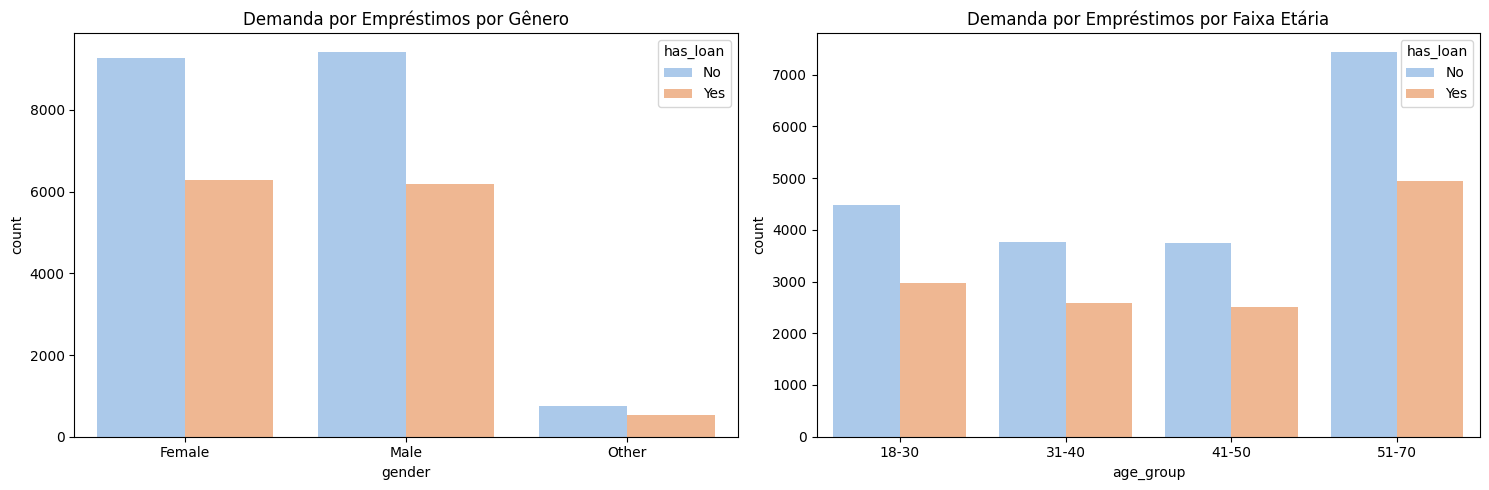


Distribuição de tipos de empréstimo por gênero e faixa etária (%):
loan_type         Business    Car  Education   Home
gender age_group                                   
Female 18-30         24.44  24.23      25.00  26.32
       31-40         26.57  22.74      24.53  26.16
       41-50         25.47  25.39      24.82  24.32
       51-70         24.85  24.77      24.90  25.48
Male   18-30         25.97  24.35      25.19  24.49
       31-40         24.33  23.52      27.16  24.98
       41-50         24.36  23.70      25.85  26.10
       51-70         25.29  25.51      24.95  24.26
Other  18-30         22.95  27.05      26.23  23.77
       31-40         20.00  24.17      22.50  33.33
       41-50         26.32  17.11      28.95  27.63
       51-70         25.82  25.82      23.47  24.88


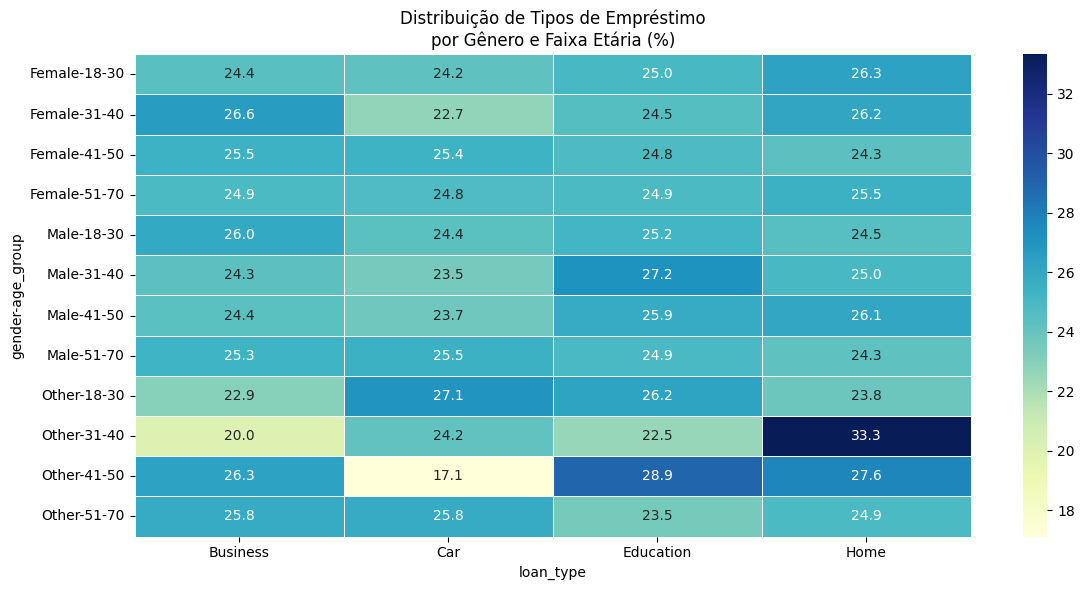

In [21]:



sns.set_palette("pastel")

# Verificar se as colunas necessárias existem
required_columns = ['age', 'gender', 'has_loan', 'loan_type']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    raise ValueError(f"Colunas faltando no DataFrame: {missing_cols}")


try:
    df['age_group'] = pd.cut(df['age'],
                           bins=[18, 30, 40, 50, 70],
                           labels=['18-30', '31-40', '41-50', '51-70'],
                           right=False)
except Exception as e:
    print(f"Erro ao criar faixas etárias: {str(e)}")
    # Criar fallback básico se houver problemas com pd.cut
    df['age_group'] = np.where(df['age'] < 30, '18-30',
                              np.where(df['age'] < 40, '31-40',
                                      np.where(df['age'] < 50, '41-50', '51-70')))

# 2. Filtrar apenas quem tem empréstimos com verificação
if 'has_loan' in df.columns:
    df_loans = df[df['has_loan'] == 'Yes'].copy()
else:
    raise KeyError("Coluna 'has_loan' não encontrada para filtrar empréstimos")


gender_analysis = pd.DataFrame()
if 'gender' in df.columns:
    gender_dist = df_loans['gender'].value_counts(normalize=True).mul(100).round(2)
    print("\nDistribuição por gênero entre clientes com empréstimos:")
    print(gender_dist)


    try:
        gender_comp = pd.crosstab(df['gender'], df['has_loan'])
        chi2, p, dof, expected = stats.chi2_contingency(gender_comp)
        print(f"\nTeste de Chi-quadrado (demanda por gênero):")
        print(f"Estatística Chi2: {chi2:.2f}, Valor-p: {p:.4f}")
    except Exception as e:
        print(f"\nErro no teste de Chi-quadrado por gênero: {str(e)}")
else:
    print("\nAviso: Coluna 'gender' não encontrada para análise")


if 'age_group' in df.columns:
    age_dist = df_loans['age_group'].value_counts(normalize=True).mul(100).round(2)
    print("\nDistribuição por faixa etária entre clientes com empréstimos:")
    print(age_dist)

    try:
        age_comp = pd.crosstab(df['age_group'], df['has_loan'])
        chi2_age, p_age, dof_age, expected_age = stats.chi2_contingency(age_comp)
        print(f"\nTeste de Chi-quadrado (demanda por faixa etária):")
        print(f"Estatística Chi2: {chi2_age:.2f}, Valor-p: {p_age:.4f}")
    except Exception as e:
        print(f"\nErro no teste de Chi-quadrado por idade: {str(e)}")
else:
    print("\nAviso: Coluna 'age_group' não foi criada corretamente")


plt.figure(figsize=(15, 5))


if 'gender' in df.columns:
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='gender', hue='has_loan')
    plt.title('Demanda por Empréstimos por Gênero')
else:
    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, 'Dados de gênero não disponíveis',
             ha='center', va='center')
    plt.title('Dados indisponíveis')


if 'age_group' in df.columns:
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x='age_group', hue='has_loan',
                 order=['18-30', '31-40', '41-50', '51-70'])
    plt.title('Demanda por Empréstimos por Faixa Etária')
else:
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'Dados de faixa etária não disponíveis',
             ha='center', va='center')
    plt.title('Dados indisponíveis')

plt.tight_layout()
plt.show()


if all(col in df_loans.columns for col in ['gender', 'age_group', 'loan_type']):
    try:
        cross_table = pd.crosstab(
            index=[df_loans['gender'], df_loans['age_group']],
            columns=df_loans['loan_type'],
            normalize='index'
        ).mul(100).round(2)

        print("\nDistribuição de tipos de empréstimo por gênero e faixa etária (%):")
        print(cross_table)

        plt.figure(figsize=(12, 6))
        sns.heatmap(
            cross_table,
            annot=True,
            fmt='.1f',
            cmap='YlGnBu',
            linewidths=.5
        )
        plt.title('Distribuição de Tipos de Empréstimo\npor Gênero e Faixa Etária (%)')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"\nErro na análise combinada: {str(e)}")
else:
    print("\nAviso: Dados incompletos para análise combinada")

# 4. Análise por Região e Gênero/Analysis by Region and Gender

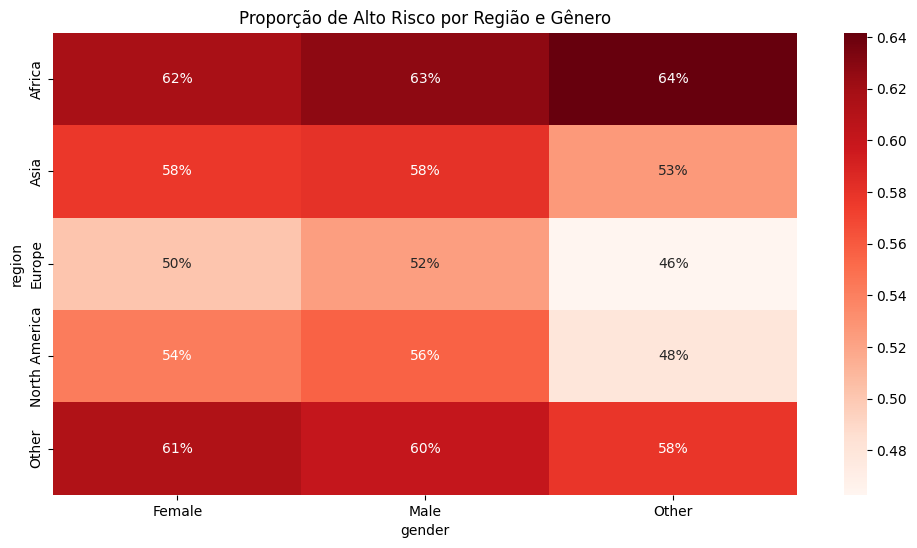

In [22]:

if 'region' in df.columns and 'gender' in df.columns:
    regional_panel = df.groupby(['region', 'gender']).agg({
        'risco_final_v2': lambda x: (x == 'Alto Risco').mean(),
        'monthly_income_usd': 'median',
        'debt_to_income_ratio': 'median'
    }).round(2)


    plt.figure(figsize=(12, 6))
    risco_regional = pd.crosstab(index=df['region'],
                               columns=df['gender'],
                               values=(df['risco_final_v2'] == 'Alto Risco'),
                               aggfunc='mean')
    sns.heatmap(risco_regional, annot=True, cmap='Reds', fmt='.0%')
    plt.title('Proporção de Alto Risco por Região e Gênero')
    plt.show()

# 5. Análise de Profissões de Alto Risco/Analysis of High-Risk Professions


Top 10 Profissões com Maior Risco:
job_title
Salesperson    0.60
Accountant     0.58
Driver         0.57
Engineer       0.57
Manager        0.57
Student        0.57
Doctor         0.57
Unemployed     0.56
Teacher        0.56
Name: risco_final_v2, dtype: float64


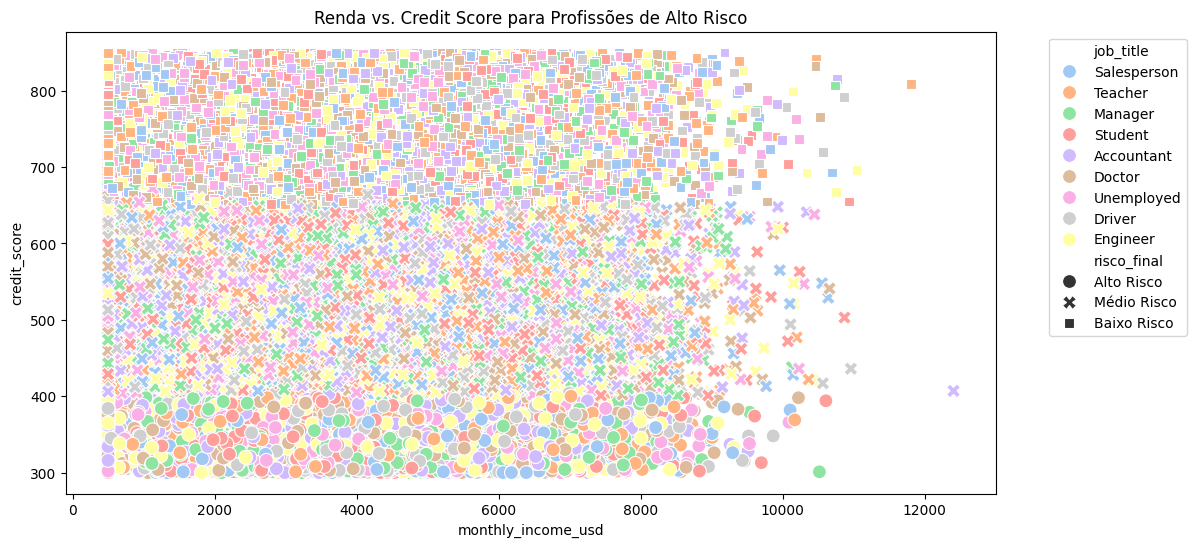

In [23]:
if 'job_title' in df.columns:

    top_risco = df.groupby('job_title')['risco_final_v2'] \
                .apply(lambda x: (x == 'Alto Risco').mean()) \
                .sort_values(ascending=False) \
                .head(10)

    print("\nTop 10 Profissões com Maior Risco:")
    print(top_risco.round(2))


    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df[df['job_title'].isin(top_risco.index)],
                   x='monthly_income_usd', y='credit_score',
                   hue='job_title', style='risco_final', s=100)
    plt.title('Renda vs. Credit Score para Profissões de Alto Risco')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Conclusão da Segmentação de Perfil

A análise da segmentação de perfil revelou padrões importantes em relação a região, gênero e profissões, destacando fatores que influenciam o risco creditício. Abaixo estão os principais insights:

#### **1. Região**
- **Diferenças Regionais:** Observou-se variações significativas no risco creditício entre regiões. Por exemplo, a região da Europa apresentou menor proporção de alto risco, enquanto a África teve a maior. Isso pode estar relacionado a fatores econômicos, acesso a crédito e estabilidade financeira regional.
- **Preferências por Empréstimos:** A distribuição dos tipos de empréstimo também variou por região, indicando diferenças culturais ou necessidades financeiras específicas. Por exemplo, empréstimos para educação foram mais comuns em certas regiões, enquanto empréstimos para negócios predominaram em outras.

#### **2. Gênero**
- **Distribuição Equilibrada:** Homens e mulheres apresentaram proporções similares na base de dados, com uma ligeira vantagem para mulheres em termos de crédito (scores médios mais altos). O grupo "Outros" mostrou maior variabilidade, sugerindo a necessidade de análises mais personalizadas para essa categoria.
- **Demanda por Empréstimos:** Não houve diferença estatisticamente significativa na demanda por empréstimos entre gêneros, indicando que o acesso ao crédito é equilibrado nesse aspecto.

#### **3. Profissões**
- **Profissões de Alto Risco:** Certas ocupações, como motoristas e trabalhadores autônomos em setores informais, apresentaram maior proporção de alto risco. Essas profissões geralmente estão associadas a renda variável ou menor estabilidade financeira.
- **Profissões com Melhor Desempenho:** Profissionais com formação superior (médicos, engenheiros) tiveram os melhores scores de crédito, refletindo a relação entre educação, renda e estabilidade financeira.

#### **4. Limitações**
- **Taxa de Inadimplência:** Não foi possível analisar a taxa de inadimplência devido à falta de dados específicos no conjunto de dados. Essa variável seria crucial para uma avaliação mais precisa do risco de crédito, pois permitiria correlacionar diretamente o histórico de pagamentos com as características demográficas e financeiras.

---


### Profile Segmentation Conclusion

The profile segmentation analysis revealed important patterns related to region, gender, and professions, highlighting factors that influence credit risk. The main insights are summarized below:

#### **1. Region**

* **Regional Differences:** Significant variations in credit risk were observed across regions. For example, the European region showed a lower proportion of high-risk profiles, while Africa had the highest. This could be related to economic factors, access to credit, and regional financial stability.
* **Loan Preferences:** The distribution of loan types also varied by region, indicating cultural differences or specific financial needs. For instance, education loans were more common in certain regions, while business loans predominated in others.

#### **2. Gender**

* **Balanced Distribution:** Men and women showed similar proportions in the dataset, with a slight advantage for women in terms of credit (higher average scores). The “Other” group showed greater variability, suggesting the need for more personalized analysis for this category.
* **Loan Demand:** There was no statistically significant difference in loan demand between genders, indicating balanced access to credit in this aspect.

#### **3. Professions**

* **High-Risk Professions:** Certain occupations, such as drivers and self-employed workers in informal sectors, showed a higher proportion of high-risk profiles. These professions are typically associated with variable income or lower financial stability.
* **Best-Performing Professions:** Professionals with higher education (e.g., doctors, engineers) had the best credit scores, reflecting the relationship between education, income, and financial stability.

#### **4. Limitations**

* **Default Rate:** It was not possible to analyze the default rate due to the absence of specific data in the dataset. This variable would be crucial for a more accurate credit risk assessment, as it would allow a direct correlation between payment history and demographic and financial characteristics.

---

If you’ve made it this far, I would greatly appreciate it if you could leave an upvote and share a comment on this notebook. Your feedback is essential for my improvement and for continuing to create even better content!